# **Analyzing Drug-Gene Interaction With DGIdb -<br> Therapeutic target of hypertension** <br>
By: Sara Elqaisi <br>
Date: May 2025 <br>

### **Summary & Objective**
The goal of this project is to investigate drug-gene interactions that relate to hypertension using a genomic database. Interaction data for specific genes could be analyzed by using DGIdb. The project involves using python to query drug-gene interactions, gather fetched data, and analyze the impact of different drug categories. The purpose of this project is to gain a better understanding of how treatment strategies for hypertension could be improved and expanded on by the use of genomic tools. <br><br>

### **Methodology: Genomic Tools & Resources <br>**

Drug-Gene Interaction Database - DGIdb API
* This API is necessary as it will allow retrieval of drug-gene interaction data that is relevant to hypertension treatment.
* This tool will be used to fetch interaction data for specific genes through queries using GraphQL.
* Some features of this source include a well structured drug-gene interaction platform, it allows for filtering by source, interaction type, and gene category. It is an open source tool and is very well documented which aids in integration & application.
<br><br>


GraphQL Playground - API Test Tool
* Before writing python code, queries could be tested using this environment.
* This is a useful tool to ensure queries are written correctly, and returning the correct data before implementing them in python.
* Some features of GraphQL is an interactive interface for testing queries, and receiving real time responses for debugging purposes.
<br><br>


Python w/ Requests, Pandas, Data Visualization libraries
* Python allows for automation of API queries and data processing using different libraries and tools available.
* Requests library will be used to send API calls and retrieve responses.
* The pandas library will help structure & manipulate the data in order to be analyzed.
* Matplotlib & Seaborn could be used for visualizing drug-gene interaction trends, which could help with better interpretation of the results gathered.
<br><br>

ClinVar - NCBI tool through Biopython
* The NCBI Entrez API is used through Biopython in order to search and retrieve variant data.
* ClinVar database is used to obtain relevant information about gene variants associated with hypertension.

### **Analysis Pipeline**<br>

1. Parse master_file. <br>
Load the provided csv file in order to identify all unique drug categories and extract the associated genes.

2. Query DGIdb API. <br>
Use GraphQL playground to manually test queries. Create Python functions to send requests to the API in order to fetch and store drug-gene interaction data.

3. Filter & Analyze Results. <br>
Sift through the gathered data by adjusting the search filters such as interaction type, gene category or source. Analyze how different drug categories affect gene interactions related to hypertension through different python tools and graphical representations.

4. Integrate ClinVar. <br>
Query ClinVar through the Entrez API to retrieve variant inormation related to hypertension through specific genes of interest. This will enhance research and specific findings on certain drug-gene interactions.

<br><br>



### **Example Queries Tested in GraphQL**<br>

Retrieve all genes that interact with drug: Hydrochlorothiazide <br>
This query will fetch all genes interacting with the drug, including concept ID, interaction scores and types, and other details.

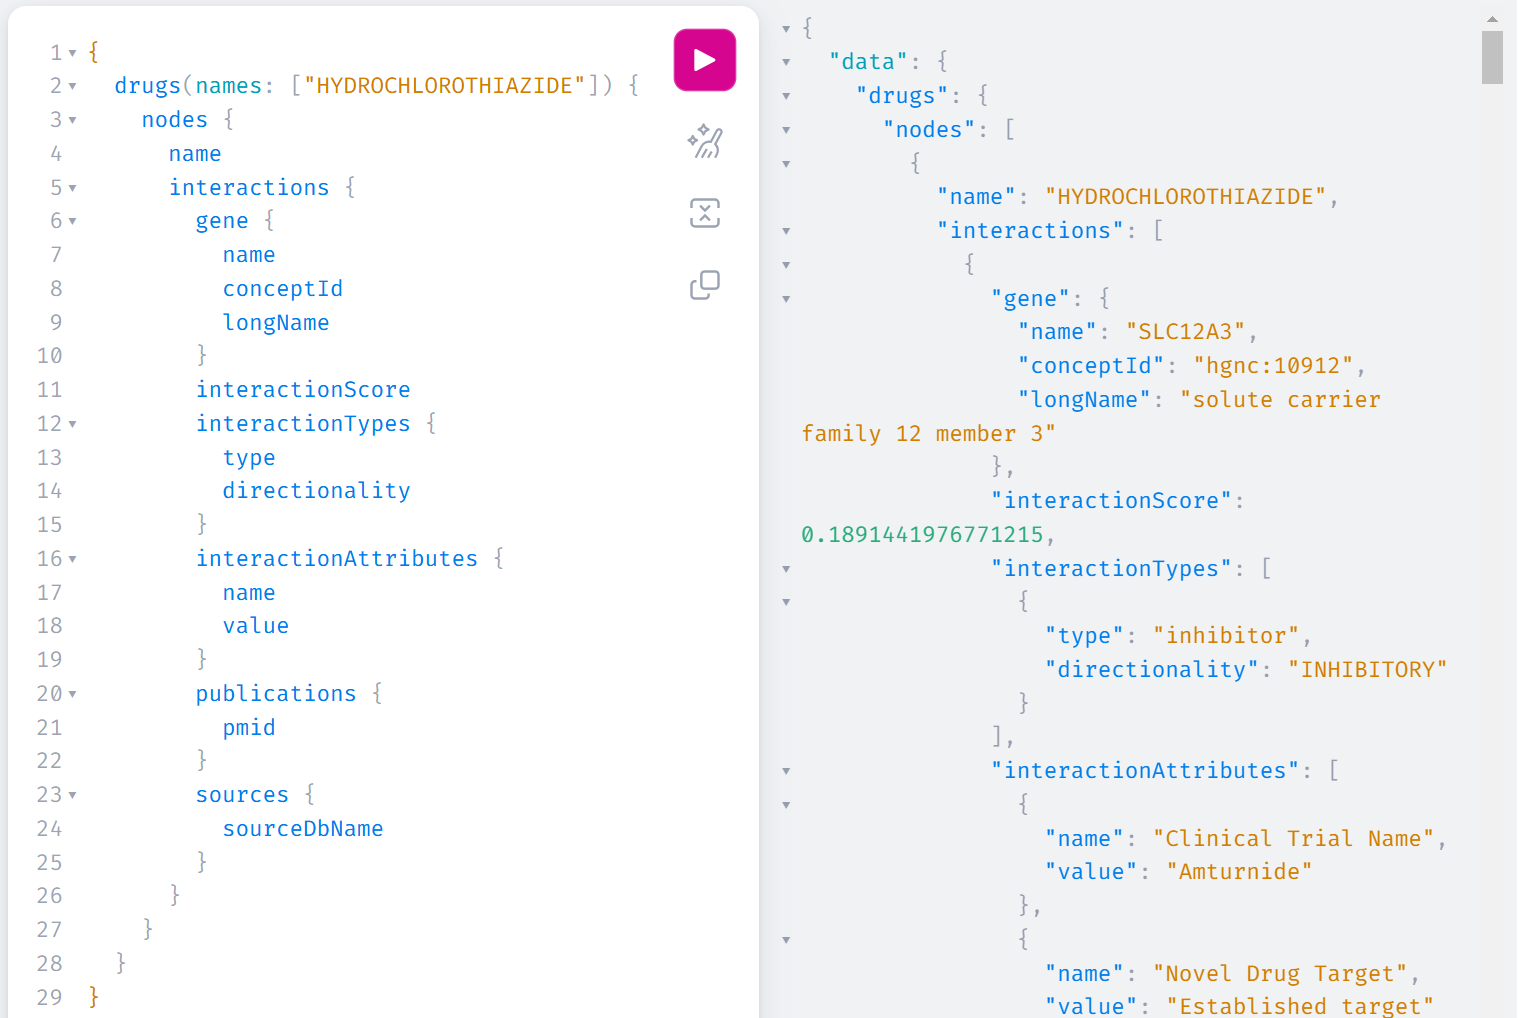

Search for Beta Blocking Agents - Atenolol & Metoprolol. <br> Output from GraphQL, where each node represents a different drug, and details regarding gene interactions and other data are accessible.
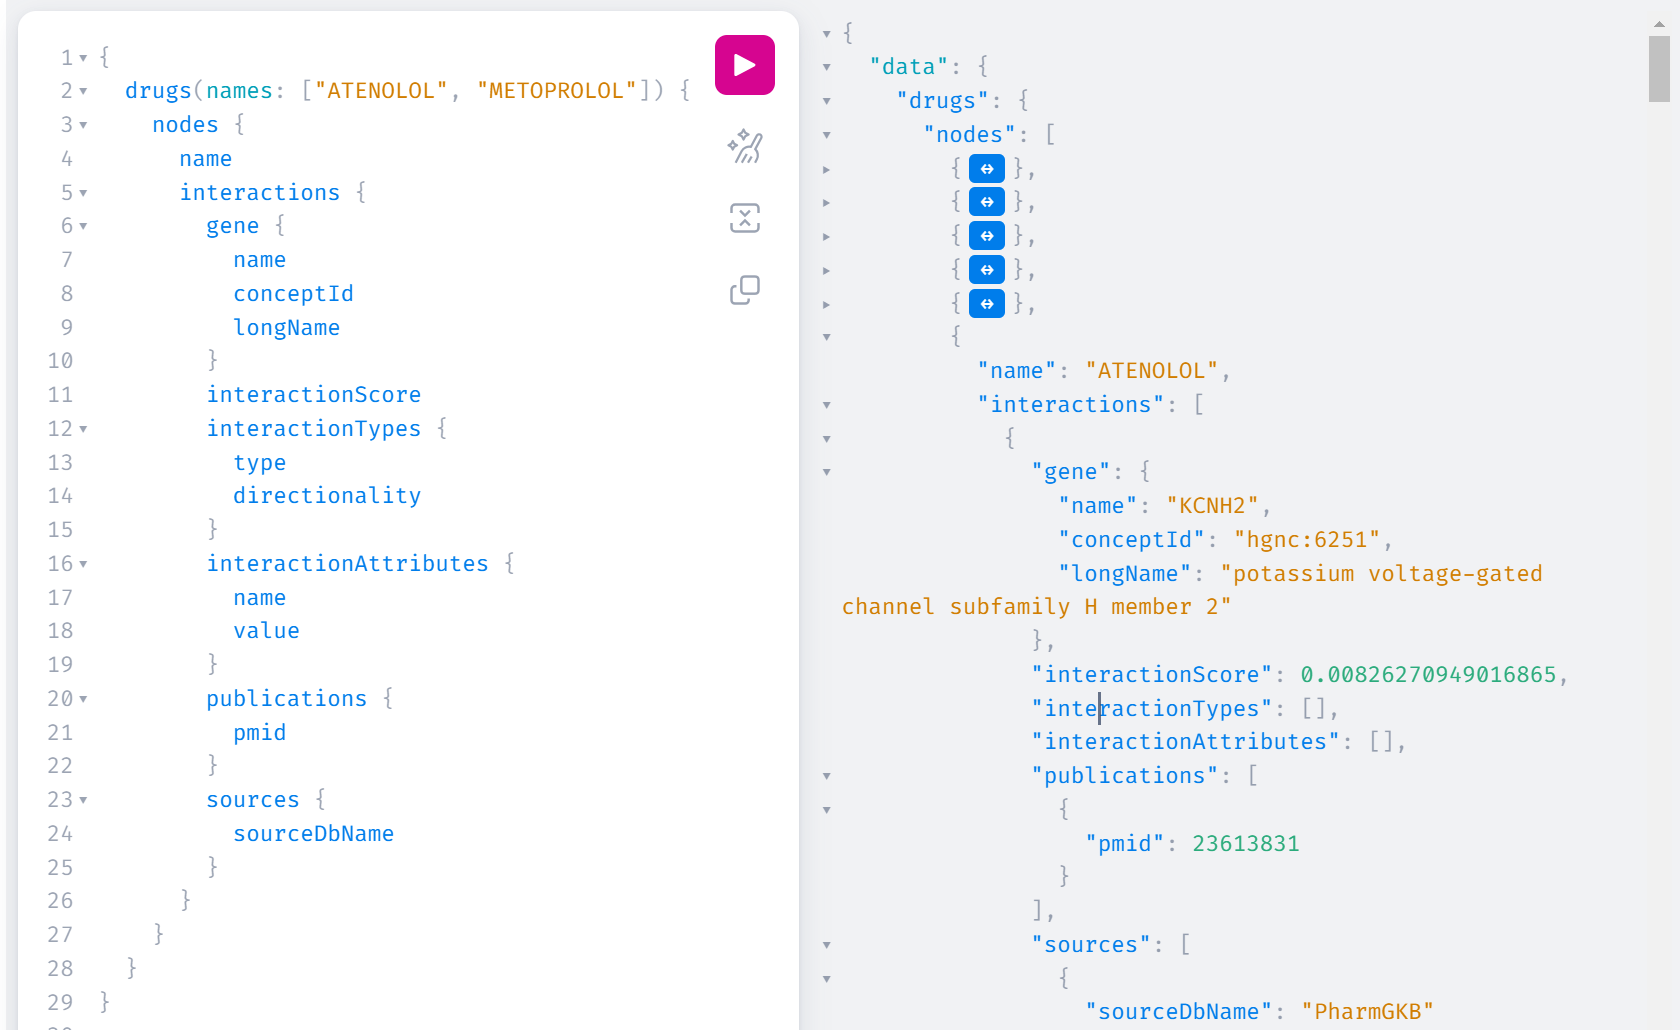

### **GraphQL Query Syntax Explanation**

GraphQL queries allow us to request specific data from the API in an organized and structured way. Below is the breakdown of the queries submitted:<br>
<br>
* The first example above searches the drug named "HYDROCHLOROTHIAZIDE" which is placed inside the brackets next to "names" label. This will request the drug-gene interactions for this specific drug. The second example searches for two drugs which is done by placing the names side by side within the brackets, seperated by a comma.
*"nodes{name}" will retrieve the drug name.
* "interactions{gene{name, conceptId, longName}} will fetch specific gene information that are affected by this drug, such as the genes name, ID, and its full name.
* "interactionScore" will give a number representing a score which indicates the strength of the interaction. This is the significance or confidence of the drug-gene interaction. DGIdb calculates the score based on interaction type, evidence to support the claims, and the amount of supporting sources. A higher score shows more evidence in the drug-gene interaction, and is therefore more relevenat. A lower interaction score would mean there are fewer supporting evidence which could mean the interaction is based on indirect sources and could be hypothetical.
* "interactionType{type, directionality}" will list the interaction type and directionality of the drug, such as if the drug inhibits, activates, or modulates the gene.
* "publications{pmid}" will retrieve PubMed IDs of research articles and references to support the interaction listed.
<br><br>
source: https://dgidb.org/about
<br><br><br>

### **API Output Explanation**

The query submitted will include all fields being requested, such as the drug name, gene information, interaction information, and publications. The API output will return structured JSON data with each field listed and its value that is stored in the database. <br><br>

For example, the first query output shows the drug name which confirms the queried drug. Then the interacting genes will be listed one after the other. The line states "name":"SLC12A3" which means the dug Hydrochlorothiazide has an affect on the SLC12A3 gene. Follwoing this is the genes ID and full name. <br><br>
The interaction score of 0.1891... suggests a lower level of confidence in this interaction which would explain the lack of publications for this specific drug-gene interaction. The interaction type states "inhibitor" which means the drug Hydrochlorothiazide inhibits the SLC12A3 gene.
<br><br>
Finally, the publlications being empty would mean that this conclusion is based on indirect sources or lacks detailed validation.  <br><br><br>

### **Application**<br>
Import necessary libraries and constants.

In [ ]:
# imports
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
!pip install biopython
from Bio import Entrez

# constants
DGIDB_API_URL = "https://dgidb.org/api/graphql"
CSV_FILE_PATH = "/master_file.csv"
Entrez.email = "elqaissa@gmail.com" # required by NCBI Entrez API

Confirm connection by testing query request. Output expected is JSON response containing drug-gene interaction data.

In [ ]:
def test_DGIdb_api():
  """
  Test the connection to DGIdb API with a sample query.
  """
  # define GraphQL Query
  query = """
  {
    drugs(names: ["HYDROCHLOROTHIAZIDE"]) {
      nodes {
        name
        interactions {
          gene {
            name
          }
          interactionScore
          interactionTypes {
            type
          }
          publications {
            pmid
          }
        }
      }
    }
  }
  """

  # make the API request
  response = requests.post(DGIDB_API_URL, json={"query": query})

  # check if request was successful
  if response.status_code == 200:
      print("API connection successful.")
  else:
    # if error occured, print status code and details
      print(f"API connection failed: {response.status_code}")

  # return True or False based on code
  return response.status_code == 200

test_DGIdb_api()

API connection successful.


True

<br><br>
Load CSV file<br>

In [ ]:
def load_csv_file(file_path):
  """
  Load CSV file into a pandas DataFrame.
  """
  # use pandas library to load csv file into a DataFrame
  try:
    # read file
    df = pd.read_csv(file_path)

    # check if DataFrame is empty
    if df.empty:
      raise ValueError("CSV file is empty.")

    # return the dataframe
    return df

  # file has not been found, print error message & return None
  except Exception as e:
    print(f"Error loading CSV file: {e}")
    return None

df = load_csv_file(CSV_FILE_PATH)

<br><br>
Gather all drugs from CSV file. <br>
*Note: Some entries in the master_file.csv do not include drugs, so these rows will be skipped for the purpose of fetching drug-gene interactions.*

In [ ]:
def create_drug_gene_dict(df):
  """
  Create a dictionary mapping drugs to their associated genes.
  """
  # remove all rows from df that do not include drugs
  df_with_drugs = df.dropna(subset=["Drug(s)"])

  # drugs with their associated genes will be stored in dictionary
  drug_gene_dict = {}

  # only variable needed is the row
  for _, row in df_with_drugs.iterrows():
    # store gene & drugs in seperate variables
    drugs = row["Drug(s)"].split(", ") # some entries might have multiple drugs
    gene = row["Gene"]

    #loop through all drugs
    for drug in drugs:
      # if the drug does not exist in dictionary, add drug as key & new set as val
      if drug not in drug_gene_dict:
        drug_gene_dict[drug] = set() # use set to avoid duplicates

      # drug exists in dict, so add gene to correct drug set
      drug_gene_dict[drug].add(gene)

  # test: print drug-gene map in an organized structure
  for drug, genes in drug_gene_dict.items():
    print(f"{drug}:")
    for gene in genes:
      print(f"  - {gene}")
    print()

  return drug_gene_dict
drug_gene_dict = create_drug_gene_dict(df)

hydrochlorothiazide:
  - nan
  - ADRB1
  - TCF7L2
  - PLCE1
  - DIAPH3
  - PRKCA
  - ADRB2
  - YEATS4
  - SH2B3
  - CSMD1
  - ILKAP
  - FBXL17
  - ADO
  - SLC25A31
  - CSK
  - NUCB2
  - HS3ST4
  - HMGCS2
  - TET2
  - PRKAG2
  - TXNDC11
  - LRRC15
  - DOT1L
  - VASP
  - NELFCD
  - ACE2
  - GPR83
  - BEST3
  - CSMD3
  - TTC6
  - SPINK14
  - C5orf56
  - FGF5
  - CNTNAP2
  - NEDD4L
  - UGGT2
  - ZNF343
  - KCNJ1
  - ANKFN1
  - ADD1
  - SLIT1
  - ERCC6L2
  - WNK1

diuretics:
  - NEDD4L
  - PDE4D
  - nan
  - ZNF343
  - NELFCD
  - HS3ST4
  - KCNE1
  - PRKCA
  - CSMD3
  - ERCC6L2
  - CNTNAP2

Thiazides:
  - nan
  - ZNF343
  - NELFCD
  - HS3ST4
  - PRKCA
  - CSMD3
  - ERCC6L2
  - CNTNAP2

plain:
  - nan
  - ZNF343
  - NELFCD
  - HS3ST4
  - PRKCA
  - CSMD3
  - ERCC6L2
  - CNTNAP2

atenolol:
  - NEDD4L
  - ADRB1
  - nan
  - SLC25A31
  - ADD1
  - CDCA3,GNB3,USP5
  - ACE2
  - GRK5
  - CYP11B2
  - ACE
  - AGT
  - AGTR1
  - KCNH2
  - ADRB2
  - LRRC15
  - FGF5

benazepril:
  - ADD1
  - ACE
  - CYP11B2

<br><br>
Function to query DGIdb for drug-gene interactions

In [ ]:
def fetch_drug_gene_interactions(drug_name):
  """
  Fetch drug-gene interactions from DGIdb for a specific drug.
  """
  query = f"""
    {{
      drugs(names: ["{drug_name}"]) {{
        nodes {{
          name
          interactions {{
            gene {{
              name
              conceptId
            }}
            interactionScore
            interactionTypes {{
              type
              directionality
            }}
            interactionAttributes{{
              name
              value
            }}
            publications {{
              pmid
            }}
          }}
        }}
      }}
    }}
  """
  response = requests.post(DGIDB_API_URL, json={"query": query})

  # check if request is succesful or not
  if response.status_code == 200:
    data = response.json()
    return data["data"]["drugs"]["nodes"]
  else:
    print(f"Error {response.status_code}: {response.text}")
    return None

<br><br>
Build dictionary of interactions using requested data

In [ ]:
def build_interaction_dict(drug_gene_dict):
  """
  Build a full dictionary of drug interactions for relevant genes.
  """
  # new dictionary to store drug-gene interactions and details
  interaction_data = {}

  # loop through drug and genes from dictionary created from df
  for drug, valid_genes in drug_gene_dict.items():
    result = fetch_drug_gene_interactions(drug) # fetch drug gene interactions for given drug

    if result:
      # each node in result is a specific drug & its interactions
      for drug_node in result:
        drug_name = drug_node["name"]  # store drug name from node
        valid_interactions = {}

        # for each interaction under the drug
        for interaction in drug_node["interactions"]:
          gene_name = interaction["gene"]["name"]  # variables to store gene name

          # if the gene is included in csv file, then store interaction data
          if gene_name in valid_genes:
            interaction_score = interaction["interactionScore"]
            concept_id = interaction["gene"]["conceptId"]
            interaction_types = [
              {"type": it["type"], "directionality": it["directionality"]}
              for it in interaction.get("interactionTypes", [])
              if "type" in it and "directionality" in it
            ]
            interaction_attributes = {
              attr["name"]: attr["value"]
              for attr in interaction.get("interactionAttributes", [])
              if "name" in attr and "value" in attr
            }
            publications = [pub["pmid"] for pub in interaction["publications"]]

            # Store all extracted data in the dictionary
            valid_interactions[gene_name] = {
              "interaction_score": interaction_score,
              "conceptId": concept_id,
              "interaction_types": interaction_types,
              "interaction_attributes": interaction_attributes,
              "publications": publications
            }

            # store drug & gene interactions if they exist
            if valid_interactions:
              interaction_data[drug_name] = valid_interactions
  return interaction_data

interaction_data = build_interaction_dict(drug_gene_dict)

<br><br>
Function to fetch the interaction results from dictionary of drug-gene interactions using drug name

In [ ]:
def search_drug(interaction_data, drug_name):
  """
  Search for a specific drug in the interaction data.
  """
  # try to look for drug name & return value, else return failed message
  return interaction_data.get(drug_name, f"No data found for {drug_name}")

# User input to search for a drug
search_term = input("Enter a drug name to search: ").strip().upper()
search_result = search_drug(interaction_data, search_term) # send user input to method to search dict
if isinstance(search_result, dict):
  # if search_result is dictionary, format & print in a readable JSON format
  print(json.dumps(search_result, indent=2))
else:
   # if search_result is not dictionary, print directly
  print(search_result)

Enter a drug name to search: HYDROCHLOROTHIAZIDE
{
  "TET2": {
    "interaction_score": 0.1891441976771215,
    "conceptId": "hgnc:25941",
    "interaction_types": [],
    "interaction_attributes": {},
    "publications": [
      25695618
    ]
  },
  "ANKFN1": {
    "interaction_score": 2.269730372125458,
    "conceptId": "hgnc:26766",
    "interaction_types": [],
    "interaction_attributes": {},
    "publications": [
      25695618
    ]
  },
  "PRKAG2": {
    "interaction_score": 0.5674325930313645,
    "conceptId": "hgnc:9386",
    "interaction_types": [],
    "interaction_attributes": {},
    "publications": [
      31327267
    ]
  },
  "HMGCS2": {
    "interaction_score": 1.134865186062729,
    "conceptId": "hgnc:5008",
    "interaction_types": [],
    "interaction_attributes": {},
    "publications": [
      29523524
    ]
  },
  "BEST3": {
    "interaction_score": 2.269730372125458,
    "conceptId": "hgnc:17105",
    "interaction_types": [],
    "interaction_attributes": {},


<br><br>
Convert dictionary to Pandas DataFrame in order to use for plotting.

In [ ]:
def convert_to_dataframe(interaction_data):
  """
  Convert the interaction data dictionary into a pandas DataFrame.
  """
  # convert dictionary to a list of records for easier visualization
  data_records = []

  # for each drug and gene, gather genes detail and store in list
  for drug, genes in interaction_data.items():
      for gene, details in genes.items():
          data_records.append({
              "Drug": drug,
              "Gene": gene,
              "Interaction Score": details["interaction_score"],
              "Concept ID": details["conceptId"],
              "Publications Count": len(details["publications"])
          })

  # create DataFrame & return it
  return pd.DataFrame(data_records)

interaction_df = convert_to_dataframe(interaction_data)

<br><br>
Use Matplotlib & Seaborn in order to produce a bar chart visualizing the ranges of interaction scores seen in the data. This will help understand the score distribution of the drug-gene interactions.

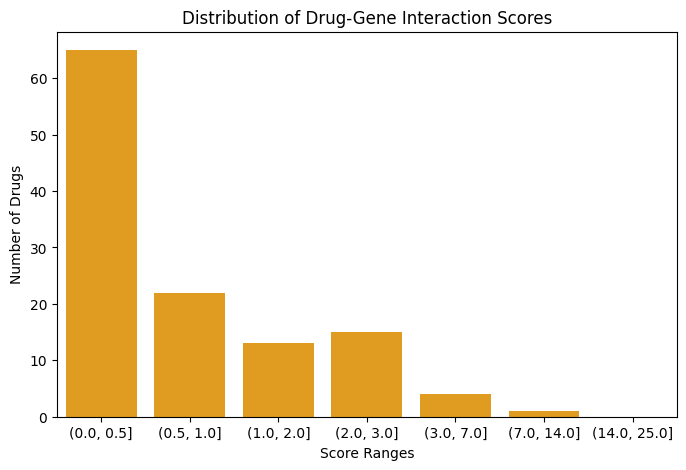

In [ ]:
def plot_interaction_score_distribution(df):
  """
  Display ranges of interaction scores gathered from dataframe in a bar chart
  using Matplolib & Seaborn
  """
  # group interaction score into bins or ranges
  df["Score Bin"] = pd.cut(df["Interaction Score"], bins=[0, 0.5, 1, 2, 3, 7, 14, 25])

  # count num of drugs in each bin
  score_counts = df["Score Bin"].value_counts().sort_index()

  # set figure size & barplot values
  plt.figure(figsize=(8, 5))
  sns.barplot(
      x=score_counts.index.astype(str), # convert bin labels to str
      y=score_counts.values, # num of drugs
      color="orange" # set bar color
  )

  # set chart title & labels before showing the plot
  plt.title("Distribution of Drug-Gene Interaction Scores")
  plt.xlabel("Score Ranges")
  plt.ylabel("Number of Drugs")
  plt.savefig("/interaction_scores.png", bbox_inches="tight") # create img to save chart
  plt.show()

plot_interaction_score_distribution(interaction_df)

The chart above illustrates the distribution of drug-gene interaction scores:
*   Over 60 drugs have very low interaction scores (below 5.0). This would suggest that the interactions stored in the database are weak with limited sources or publications supporting the claim.
*   There are a little over 20 drugs that have scores between 0.5 and 1.0. This is the next highest range in the dataset which shows a large drop in drugs as the scores increase.
*   Approximately 15 drugs are within the range of 2.0 to 3.0, while slightly fewer (about 10 drugs) fall within the score range of 1.0 to 2.0.
*   Fewer than five drugs have scores between 3.0 and 7.0, and only a handful reach the highest category (7.0-14.0). An additional bin has been added for scores above 14.0 but no drugs fell within this range.

<br><br>
This bar chart helps identify the overall trend in the interaction scores and their strengths. The majority of drug-gene interactions seen in the csv file are weak, meaning they might not be highly significant. Interactions with higher scores are rarer but would be more impactful to research or have more biological significance.

<br>

---



<br><br>
Bar chart visualizing the top 15 highest drug-gene interaction scores.<br>

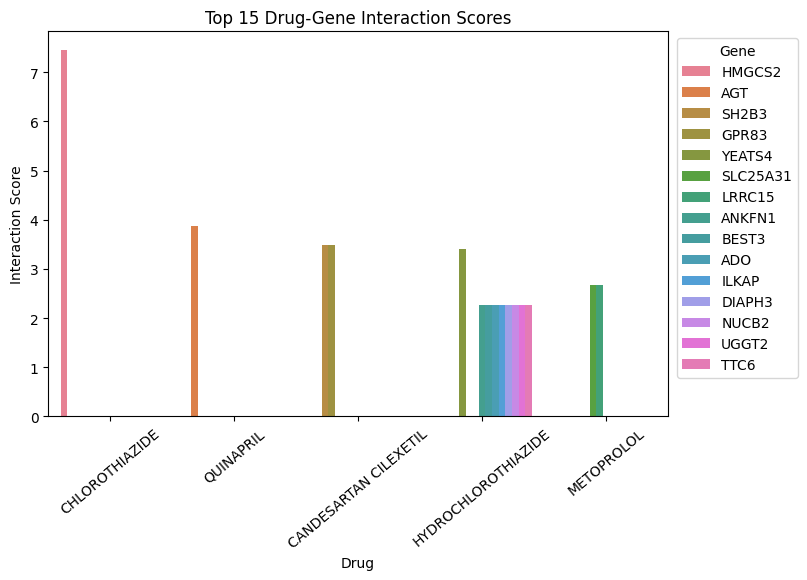

In [ ]:
def plot_top15_interaction_scores(df):
  """
  Display top 15 highest interaction scores from dataframe in a bar chart
  """
  # set a value to observe limited num of drug-gene data
  top_n = 15
  df_top = df.nlargest(top_n, "Interaction Score")

  # set the size of the plot figure
  plt.figure(figsize=(8, 5))

  # provide the df and labels
  sns.barplot(data=df_top, x="Drug", y="Interaction Score", hue="Gene")
  plt.title(f"Top {top_n} Drug-Gene Interaction Scores")
  plt.xticks(rotation=40) # tilt x-axis labels to fit chart

  # move gene legend to right side of plot
  plt.legend(title="Gene", loc='upper right', bbox_to_anchor=(1.22, 1))
  plt.savefig("/top15_interaction_scores.png", bbox_inches="tight") # create img to save chart
  plt.show()

plot_top15_interaction_scores(interaction_df)

The chart above displays the top 15 drug-gene interaction scores from the dataset. The five different drugs seen in the chart include Chlorothiazide, Quinapril, Candesartan Cilexetil, Hydrochlorothiazide, and Metoprolol. There is also a gene legend on the right side of the plot to label each bar seen to the respective gene name.<br><br>

*   Chlorothiazide has the highest interaction score which exceeds 7.0 with the gene HMGCS2. This would suggest a strong interaction with sources or publications.
*   The drugs Quinapril, Candesartan Cilexetil and Metoprolol have scores that range between 2.5 and 4.0. While Quinapril has one interaction in this chart, the other two drugs each have two gene interactions.
*   Hydrochlorothiazide has nine interactions in this chart and the scores range between 2.5 and 3.5.
<br><br>

The chart reveals which drugs exhibit the strongest interactions with a specific gene. Some drugs like Hydrochlorothiazide interact with multiple genes, while others have only one or two high scoring interactions. This observation would suggest that certain drugs may have a broader biological effect while other drugs are more targeted in their interactions. Identifying high scoring interactions could help prioritize which drug-gene relationships are more beneficial in conducting deeper investigations which will aid in drug development. <br><br>


---

<br><br>
Utilize ClinVar tool within the National Center for Biotechnology Information. Test the gene HMGCS2 to search for Single Nucleotide Polymorphism (SNPs).<br><br>

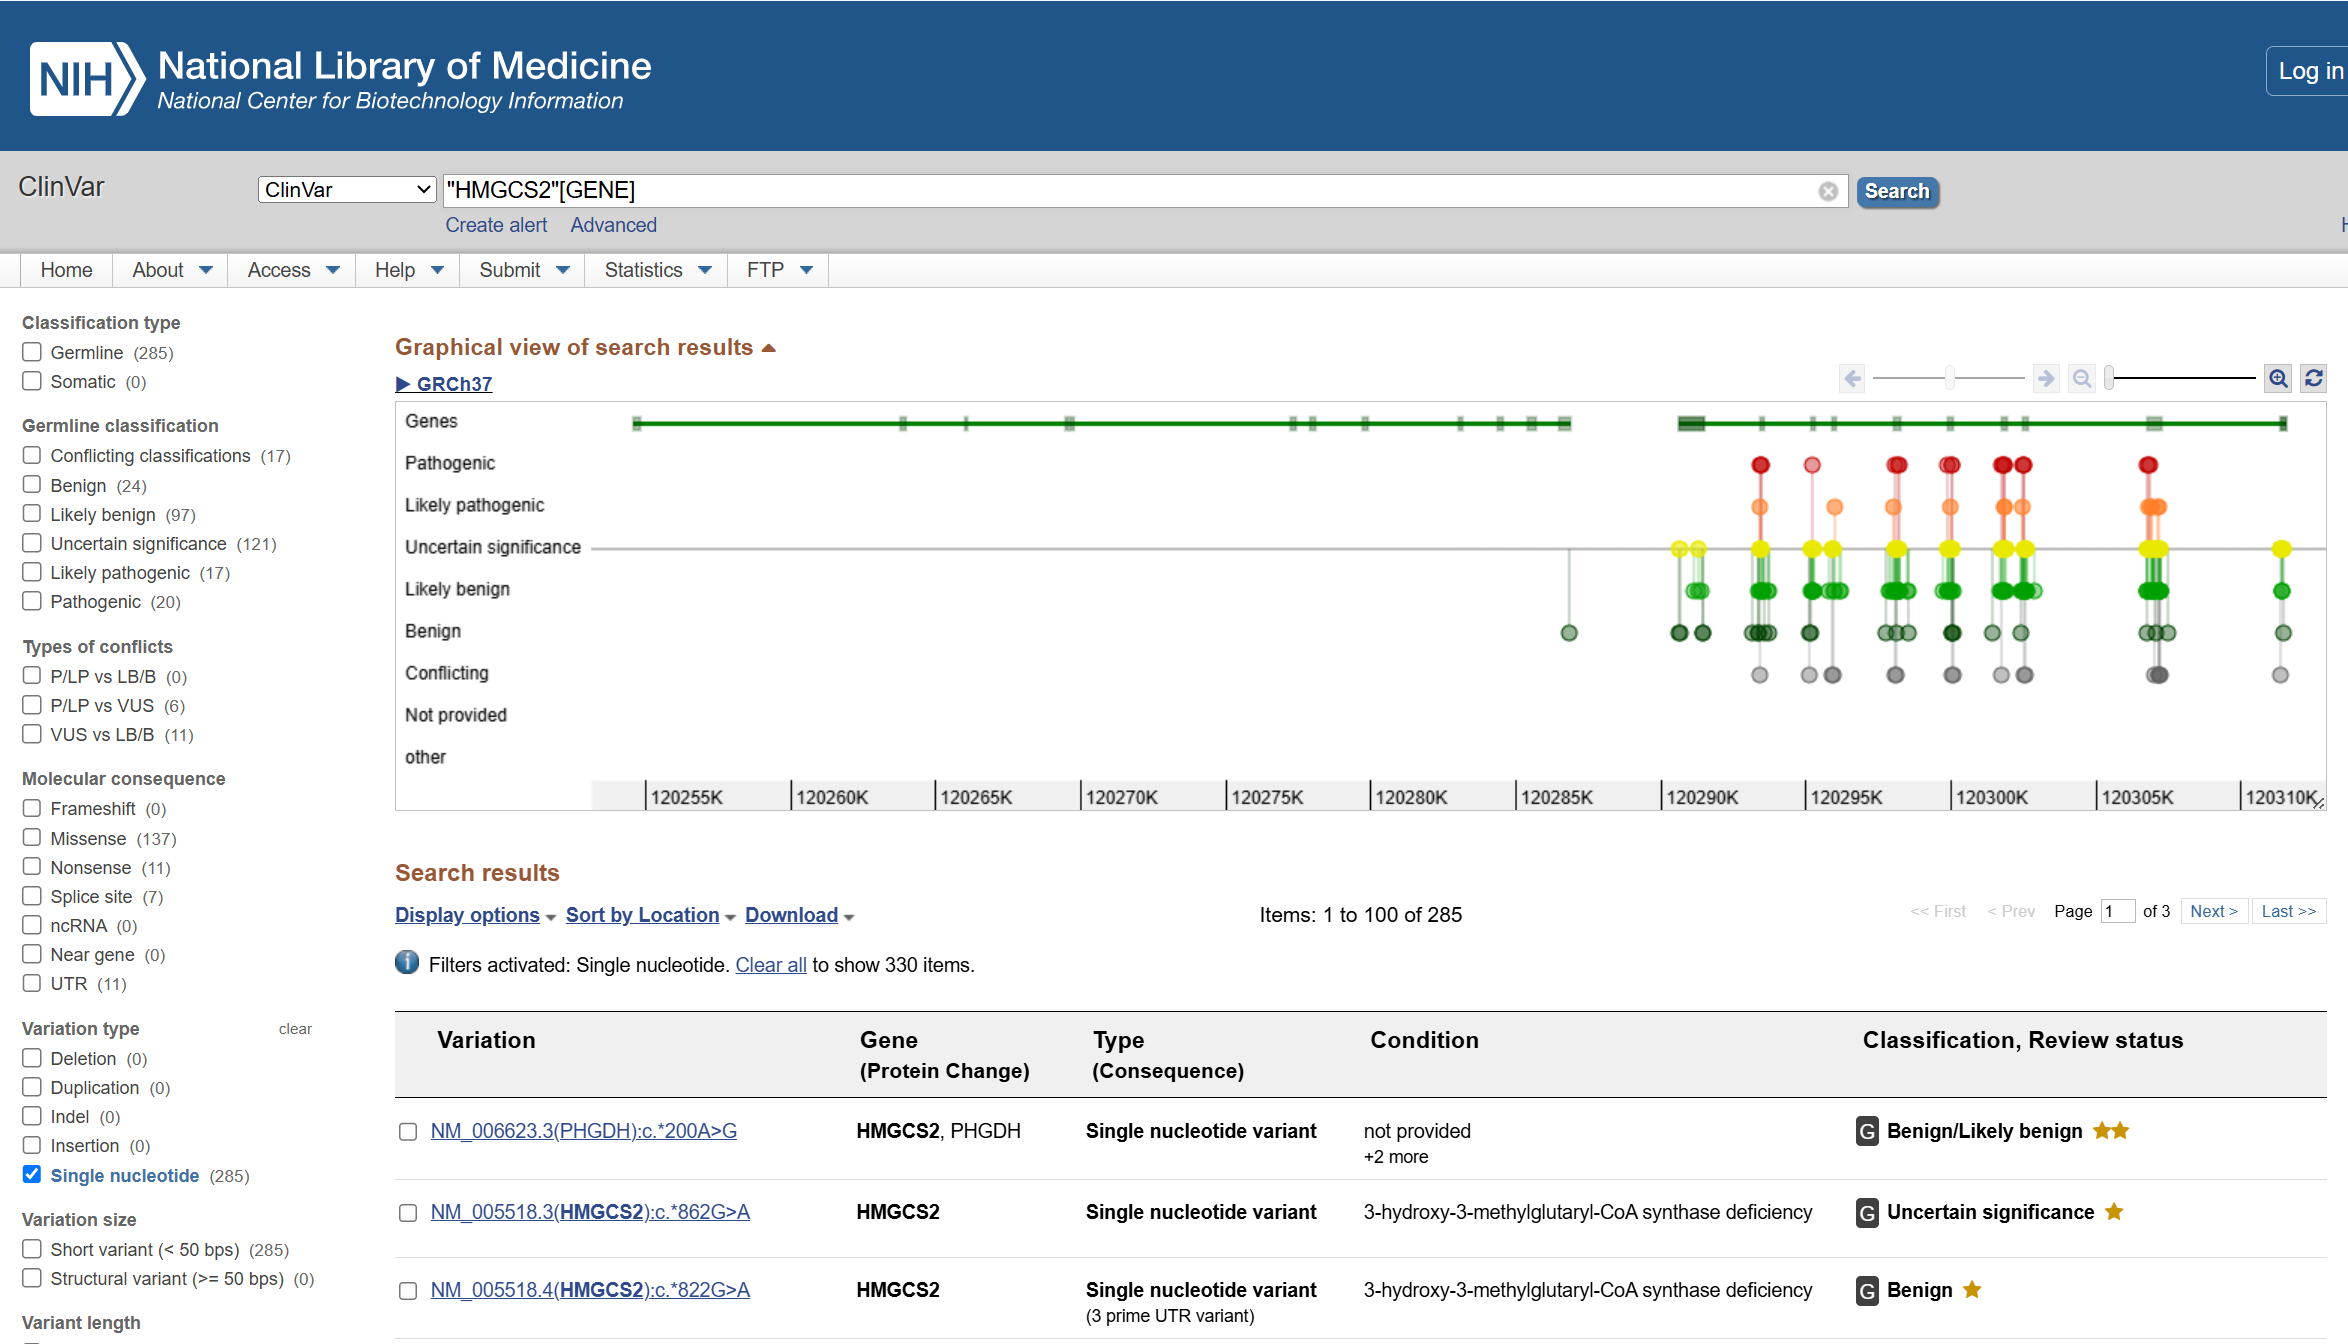

ClinVar is a publically accessible resource provided by NCBI that has information about genomic variations and their relationship to health. The website allows users to search for specific genes and view associated variant data that has been submitted by laboratories and researchers. The search would result in a graphical representation and a detailed list of results. <br><br>
The gene HMGCS2 was tested by entering the query " 'HMGCS2'[GENE] " into the search bar. The results could be refined by using the filtering options of the left side of the screen. After selecting the single nucleotide variant type filter on the left side bar, the results page displayed a total of 285 results. This tool enables a precise exploration of gene mutations and variant data relevant to research and clinical observations.

<br><br>
Use ClinVar (through NCBI's Entrez API) to gather data on variants using genes from top 15 highest interaction scores.

In [ ]:
def test_clinvar():
  """
  Test ClinVar API using HMGCS2 Gene
  """
  try:
    # create esearch() handle
    handle = Entrez.esearch(
      db="clinvar",
      term="HMGCS2[GENE] AND single nucleotide",
      retmax=5
    )

    # store parsed result in variable, and get id list
    record = Entrez.read(handle, validate=False)
    id_list = record["IdList"]

    # return true if results available
    if id_list:
      print("ClinVar API connection successful")
      return True
    else:
      print("ClinVar API connected but no results found")
      return False
  except Exception as e: # error occured, print error & return false
    print(f"ClinVar API connection failed: {e}")
    return False

test_clinvar()

ClinVar API connection successful


True

<br><br>
Method to search ClinVar for SNPs linked to gene, and gather variant information.

In [ ]:
def get_variant_info_clinvar(gene_name):
  """
  Fetch variant information from ClinVar using gene name
  """
  # esearch() handle for searching db
  handle = Entrez.esearch(
      db="clinvar",  # set db type
      term=f"{gene_name}[gene] AND single variant", # specify search filters
      retmax=10   # limit results to 10
  )

  # store parsed results in record variable
  record = Entrez.read(handle, validate=False)

  # store ID list
  id_list = record["IdList"]

  # if ID list is empty, exit function
  if not id_list:
    return []

  # handle to gather summary of each record
  summary_handle = Entrez.esummary(
    db="clinvar",
    id=",".join(id_list),
    retmode="xml"
  )

  # parse handle output
  summaries = Entrez.read(summary_handle, validate=False)

  # list to store variant information
  variant_info = []

  # # loop through data in summaries variable
  for item in summaries['DocumentSummarySet']['DocumentSummary']:
    # parse traits (conditions) if they exist
    traits = []
    if 'germline_classification' in item:
      for trait in item['germline_classification'].get('trait_set', []):
        if 'trait_name' in trait:
          traits.append(trait['trait_name'])

    # extract variation info from variation_set[0]
    variation = item.get('variation_set', [{}])[0]
    cdna_change = variation.get('cdna_change', 'N/A')
    canonical_spdi = variation.get('canonical_spdi', 'N/A')

    # add fields to variant info list
    variant_info.append({
      'title': item.get('title', 'N/A'),
      'variation_id': item.get('variation_set', [{}])[0].get('measure_id', 'N/A'),
      'clinical_significance': item.get('germline_classification', {}).get('description', 'N/A'),
      'review_status': item.get('germline_classification', {}).get('review_status', 'N/A'),
      'condition': ", ".join(traits) if traits else 'N/A',
      'accession': item.get('accession', 'N/A'),
      'cdna_change': cdna_change,
      'canonical_spdi': canonical_spdi,
    })

  # return vairant info list
  return variant_info

<br><br>
Loop through top genes and collect SNPs using get_variant_info_clinvar() method.

In [ ]:
def fetch_top_gene_snps(df_top):
  """
  Gather all variant information from ClinVar using top 15 interaction scores genes
  """
  # get top 15 gene names from DataFrame df_top
  top_genes = df_top["Gene"].unique()

  # create dictionary to store gene name as key and SNPs as values
  top_gene_snps = {}

  # loop through each gene to fetch variant data
  for gene in top_genes:
    # store result of method call
    results = get_variant_info_clinvar(gene)

    # store gene name & snps into dictionary
    top_gene_snps[gene] = results

  # print dictionary
  print(json.dumps(top_gene_snps, indent=2))

# get top 15 gene variants through Clinvar
df_top = interaction_df.nlargest(15, "Interaction Score")
top_gene_snps = fetch_top_gene_snps(df_top)

{
  "HMGCS2": [
    {
      "title": "NM_005518.4(HMGCS2):c.810C>G (p.Tyr270Ter)",
      "variation_id": "1019130",
      "clinical_significance": "Pathogenic",
      "review_status": "criteria provided, single submitter",
      "condition": "3-hydroxy-3-methylglutaryl-CoA synthase deficiency",
      "accession": "VCV003730215",
      "cdna_change": "c.810C>G",
      "canonical_spdi": "NC_000001.11:119759157:G:C"
    },
    {
      "title": "NM_005518.4(HMGCS2):c.1187+8C>A",
      "variation_id": "3847939",
      "clinical_significance": "Likely benign",
      "review_status": "criteria provided, single submitter",
      "condition": "3-hydroxy-3-methylglutaryl-CoA synthase deficiency",
      "accession": "VCV003712349",
      "cdna_change": "NM_005518.4(HMGCS2):c.1187+8C>A",
      "canonical_spdi": "NC_000001.11:119755418:G:T"
    },
    {
      "title": "NM_005518.4(HMGCS2):c.384A>G (p.Glu128=)",
      "variation_id": "3837035",
      "clinical_significance": "Likely benign",
      "

The NCBI ClinVar API was integrated using the Biopython Entrez module. This allows the retrieval of information regarding genes and their mutations. The top 15 drug gene interactions were used to research the most significant genes more in depth. <br><br>
The connection to the API was tested using the gene HMGCS2, and then the function get_variant_info_clinvar() was created. This method first used the esearch endpoint to gather variant IDs related to a gene with the single variant filter in place. This endpoint then allows the use of esummary to retrieve detailed summaries of each variant. The data extracted includes variant title, variation ID, clinical significance, review status, associated conditions, accession ID, and genomic change information. This was applied to the top genes in the dataset and the results are stored in a dictionary labeled as top_gene_snps which maps the gene to the respective list of variant data.
<br><br>
These results provide a meaningful view of variant level data. It will aid in deeper investigation of relationships between genes and diseases, as well as potential impacts on drug responses.




<br><br>
Main method to control order and flow of data

In [ ]:
def main():
  # test API connection
  if not test_DGIdb_api():
    return

  # load data using file path from constant
  df = load_csv_file(CSV_FILE_PATH)
  if df is None:
    return

  # create drug-gene mapping from data gathered from csv file
  drug_gene_dict = create_drug_gene_dict(df)

  # build drug-gene interaction dictionary
  interaction_data = build_interaction_dict(drug_gene_dict)

  # Allow user to search the drug-gene interaction data using a drug name
  search_term = input("Enter a drug name to search: ").strip().upper()
  search_result = search_drug(interaction_data, search_term) # send user input to method to search dict
  if isinstance(search_result, dict):
    print(json.dumps(search_result, indent=2))
  else:
    print(search_result)

  # convert interaction data to dataframe to use for visualizations
  interaction_df = convert_to_dataframe(interaction_data)

  # plot interaction scores
  plot_interaction_score_distribution(interaction_df)

  # plot top 15 highest interaction scores
  plot_top15_interaction_scores(interaction_df)

  # run clinvar test
  if not test_clinvar():
    return

  # get top 15 gene variants through Clinvar
  df_top = interaction_df.nlargest(15, "Interaction Score")
  top_gene_snps = fetch_top_gene_snps(df_top)

# entry point in case running file at once is needed
# if __name__ == "__main__":
#     main()